In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
# import plotly.plotly as py
import plotly.tools as tls
import IPython
import sklearn
import tensorflow as tf
import nltk

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()
import os
import json

print(
"""{}-{:02d}-{:02d} {:02d}:{:02d}:{:02d}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
plotly\t\t{}
----------------------
ipython\t\t{}
----------------------
sklearn\t\t{}
tensorflow\t{}
nltk\t\t{}"""
    .format(dt.year, dt.month, dt.day, 
            dt.hour, dt.minute, dt.second, 
            np.__version__, 
            scipy.__version__, 
            pd.__version__, 
            matplotlib.__version__, 
            plotly.__version__,
            IPython.__version__, 
            sklearn.__version__, 
            tf.__version__,
            nltk.__version__))

c = {'b': '#1f77b4', #blue
     'o': '#ff7f0e', #orange
     'g': '#2ca02c', #green
     'r': '#d62728', #red
     'v': '#9467bd', #violet
     'br': '#8c564b', #brown
     'p': '#e377c2', #pink
     'gr': '#7f7f7f', #grey
     'y': '#bcbd22', #yellow
     'c': '#17becf'} #cyan

2021-10-23 02:18:05
----------------------
numpy		1.19.2
scipy		1.6.2
pandas		1.2.2
matplotlib	3.3.2
plotly		5.3.1
----------------------
ipython		7.22.0
----------------------
sklearn		0.24.1
tensorflow	2.0.0
nltk		3.5


In [6]:
plotly.tools.set_credentials_file(username='shumez', api_key='0sOs8ilJtT7yxpwa88Me')
py.sign_in('shumez', '0sOs8ilJtT7yxpwa88Me')

AttributeError: module 'plotly.tools' has no attribute 'set_credentials_file'

In [7]:
# https://plotly.com/python/getting-started-with-chart-studio/
import plotly
# import plotly.plotly as py
# !pip install chart_studio
import chart_studio.plotly as py
# import plotly.tools as tls
import chart_studio.tools as tls


tls.set_credentials_file(username='shumez', api_key='0sOs8ilJtT7yxpwa88Me')

py.sign_in('shumez', '0sOs8ilJtT7yxpwa88Me')

In [3]:
# def mkana():
#     dt = datetime.datetime.now()
#     ana_name = '{}{:02d}{:02d}{:02d}{:02d}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute)
#     dir_ana = 'analysis/{}'.format(ana_name)
#     dir_ana_plot = '{}/plot'.format(dir_ana)
#     os.mkdir(dir_ana)
#     os.mkdir(dir_ana_plot)
    
#     return ana_name, dir_ana, dir_ana_plot

In [13]:
# df = pd.read_csv('data/councilor2019.csv')
# dat = pd.read_csv('data/data2019_{}.csv'.format('0716'))
dat = pd.read_csv('data/2021data.csv')
# dat_shitsumon = pd.read_csv('data/shitsumon.csv')
dat.head(5)
# dat_shitsumon.tail(10)

,ID,NAME,KANA,AGE,PIC,PARTY,PREFEC,DISTRICT,PRBLOCK,Q2_1,...,SQ8_7,SQ8_8,SQ8_9,SQ8_10,SQ8_11,SQ8_12,SQ8_13,SQ8_14,SQ8_15,SQ8_16
0,id_00002KAE,小林 悟,こばやし さとる,57,P_20211018SNSA0003S,5,1.0,1.0,NaN,3,...,1,0,0,0,1,1,0,1,0,0
1,id_00000FJJ,道下 大樹,みちした だいき,45,P_20210910SNSA0006S,2,1.0,1.0,NaN,2,...,66,66,66,66,66,66,66,66,66,66
2,id_ZZZZZ1J6,船橋 利実,ふなはし としみつ,60,P_20210921SNSA0011S,1,1.0,1.0,NaN,2,...,1,1,0,0,0,0,1,1,0,0
3,id_00002KWQ,高橋 祐介,たかはし ゆうすけ,41,P_20211011SNSA0018S,1,1.0,2.0,NaN,2,...,1,0,0,0,0,0,0,1,0,0
4,id_ZZZZZ04J,松木 謙公,まつき けんこう,62,P_20211015SNSA0021S,2,1.0,2.0,NaN,2,...,66,66,66,66,66,66,66,66,66,66


In [12]:
np.max(dat['Q2_1'])

99

In [72]:
# corona virus: 1-8
dat_cv = dat.iloc[:, 9:12]
# topics: 5-scale
dat_5s = dat.iloc[:, 12:36]
# constitution: one-hot
dat_co = dat.iloc[:, 37:]


# replace
dat_cv = dat_cv.replace(0, np.nan)
dat_cv = dat_cv.replace(66, np.nan)
dat_cv = dat_cv.replace(99, np.nan)

dat_5s = dat_5s.replace(66, np.nan)
dat_5s = dat_5s.replace(99, np.nan)

dat_co = dat_co.replace(66, np.nan)
dat_co = dat_co.replace(99, np.nan)



X = pd.concat([dat_5s, dat_co], axis=1)
dat_y = pd.concat([dat.iloc[:, 0:2], dat.iloc[:, 3], dat.iloc[:, 5:8]], axis=1)
dat_ = pd.concat([dat_y, X], axis=1)
# dat_ = pd.concat([dat.iloc[:, 1:4], dat_5scale, dat_5scale1], axis=1)

dat_.tail(5)
# dat_2scale.tail(5)

,ID,NAME,AGE,PARTY,PREFEC,DISTRICT,Q6_1,Q6_2,Q6_3,Q6_4,...,SQ8_7,SQ8_8,SQ8_9,SQ8_10,SQ8_11,SQ8_12,SQ8_13,SQ8_14,SQ8_15,SQ8_16
1053,id_00001U09,出口 慎太郎,39,2,NaN,NaN,2.0,3.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,id_00001MHO,大川 富洋,39,2,NaN,NaN,3.0,5.0,4.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1055,id_00002LPK,川西 義人,48,2,NaN,NaN,1.0,5.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056,id_00000476,田村 貴昭,60,4,NaN,NaN,5.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057,id_00002LNI,前野 真実子,37,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dat_ = dat_.dropna(thresh=15)

# df = df.dropna(thresh=10)
# dat_ = dat_.dropna(thresh=15)

# X = pd.concat([df.iloc[:, 2:4], df.iloc[:, 6:]], axis=1)
# X = pd.concat([df.iloc[:, 3], df.iloc[:, 6:]], axis=1)
# X = pd.concat([dat_.iloc[:, 0:1], dat_.iloc[:, 2:]], axis=1)
# X = dat_.iloc[:, 3:]
# X = pd.concat([dat_.iloc[:, 1], dat_.iloc[:, 3:]], axis=1)

# y = df.iloc[:, 4]
# y_gen = df.iloc[:, 2]
# y_age = df.iloc[:, 3]
# y_gen.tail()
X = dat_.iloc[:, 6:]
y = dat_.iloc[:, :6]
# y_gen

# questions = X.columns.values
# len(X)
X.tail(5)
y.tail(5)
y_party = dat_.iloc[:, 3]
y_party.tail(5)

1052    9
1053    2
1054    2
1055    2
1056    4
Name: PARTY, dtype: int64

In [65]:
y.tail(5)

,ID,NAME,AGE,PARTY,PREFEC,DISTRICT
1052,id_00002IG1,斉藤 健一郎,40,9,NaN,NaN
1053,id_00001U09,出口 慎太郎,39,2,NaN,NaN
1054,id_00001MHO,大川 富洋,39,2,NaN,NaN
1055,id_00002LPK,川西 義人,48,2,NaN,NaN
1056,id_00000476,田村 貴昭,60,4,NaN,NaN


In [31]:
# preprocessing

# df = df.dropna()
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')#, axis=0)
imp = imp.fit(X.values)
Xi = imp.transform(X.values)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Xs = sc.fit_transform(X)
Xis = sc.fit_transform(Xi)

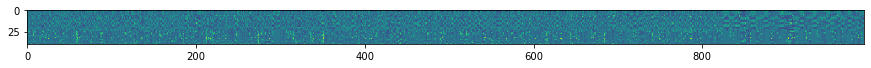

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(Xis.T, cmap='viridis')

In [60]:
parties = np.array([
    ['LDP', 'LDP', 'r', 'o', 1., '自民'],
    ['CDP', 'CDP', 'b', 'o', 2., '立憲'],
    ['Koumei', 'Koumei', 'o', 'o', 3., '公明'],
    ['JCP', 'JCP', 'g', 'o', 4., '共産'],
    ['Ishin', 'Ishin', 'y', 'o', 5., '維新'],
    ['DPFP', 'DPFP', 'c', 'o', 6., '国民'],
    ['SDP', 'SDP', 'v', 'o', 7., '社民'],
    ['NA', 'NA', 'gr', 'o', 8., ' '],
    ['NHK', 'NHK', 'gr', '^', 9., 'N党'],
    ['Reiwa', 'Reiwa', 'p', 'o', 10., 'れいわ'],
    ['Shoha', 'Shoha', 'gr', '^', 11., '諸派'],
    ['independent', 'Independent', 'br', 'o', 12., '無所属']
    # ['Kibou', 'Kibou', 'gr', '^', 8., '希望'],
    # ['Koufuku', 'Koufuku', 'gr', '^', 11., '幸福'],
    # ['Labour', 'Labour', 'gr', '^', 12., '労働'],
    # ['Olive', 'Olive', 'gr', '^', 15., 'オリーブ'],
    # ['Anrakushi', 'Anrakushi', 'gr', '^', 16., '安楽死']
])
    
#     ['Nihonmutouhatou', 'Nihonmutouhatou', 'br', '^'], 
# ])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
# lr = LogisticRegression()

# X_pca2 = pca2.fit_transform(X)
# Xs_pca2 = pca2.fit_transform(Xs)
Xis_pca2 = pca2.fit_transform(Xis)
Xis_pca3 = pca3.fit_transform(Xis)

# dir_ana, dir_ana_plot = mkana()

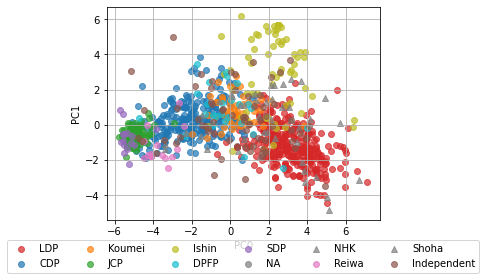

In [61]:
fig, ax = plt.subplots()

for party, i in zip(parties, range(12)):
    ax.scatter(Xis_pca2[y_party==i+1, 0], Xis_pca2[y_party==i+1, 1], label=party[1], c=c[party[2]], marker=party[3], alpha=.7)
    
ax.set(xlabel='PC0', ylabel='PC1')
ax.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, -0.07))
ax.grid(True)

plt.tight_layout()
# plt.savefig('{}/PCA2.png'.format(dir_ana_plot))
plt.show()

In [12]:
import plotly.graph_objs as go

data = []
for party, p in zip(parties, range(len(parties))):
    trance0 = go.Scatter(
        x = Xis_pca2[y==p+1, 0],
        y = Xis_pca2[y==p+1, 1],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
#             symbol = party[3],
            line = dict(
                width = .2,
            ),
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    data.append(trance0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    showlegend = True
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca2')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [26]:
np.savetxt('{}/X.csv'.format(dir_ana), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(dir_ana), Xis, delimiter=',')
np.savetxt('{}/pca2.csv'.format(dir_ana), Xis_pca2, delimiter=',')
np.savetxt('{}/comp.csv'.format(dir_ana), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(dir_ana), index=False)
dat_q.to_csv('{}/dat_q.csv'.format(dir_ana), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for ax, i in zip(axs, range(2)):
    # for party in parties:
    for party, p in zip(parties, range(16)):
        # ax.scatter(Xis_pca3[y==party[0], [0]], Xis_pca3[y==party[0], [i+1]], label=party[1], c=c[party[2]], marker=party[3])
        sc = ax.scatter(Xis_pca3[y==p+1, [0]], Xis_pca3[y==p+1, [i+1]], label=party[1], c=c[party[2]], marker=party[3], alpha=.8)
        ax.set(xlabel='PC0', ylabel='PC{}'.format(i+1))
    ax.grid(True)
#     if i == 0:
#         ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.07))
plt.tight_layout()
# plt.savefig('{}/PCA3_2.png'.format(ana_name))
plot_fig = tls.mpl_to_plotly(fig)
# py.iplot(plot_fig, filename='pca3_py')
plot_url = py.plot_mpl(fig)
plt.show()

In [130]:
import plotly.graph_objs as go

fig = tls.make_subplots(rows=1, cols=2)

data = []
l = []
for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [1]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    trace1 = go.Scatter(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [2]],
        xaxis = 'x2',
        yaxis = 'y2',
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            opacity = .7
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)

layout = go.Layout(
    title = '',
    xaxis = dict(
        title = 'PC0'
    ), 
    yaxis = dict(
        title = 'PC1'
    ),
    xaxis2 = dict(
        title = 'PC0'
    ),
    yaxis2 = dict(
        title = 'PC1'
    ),
    showlegend = False
)

# fig['layout'].up
# fig = go.Figure(data=l, layout = layout)
py.iplot(fig, filename='pca3')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [17]:
import plotly.graph_objs as go

data = []

for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y==p+1, 0],
        y = Xis_pca3[y==p+1, 1],
        z = Xis_pca3[y==p+1, 2],
        name = parties[p, 5],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d')

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
import plotly.graph_objs as go

data = []

for party, p in zip(parties, range(len(parties))):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y==p+1, [0]],
        y = Xis_pca3[y==p+1, [1]],
        z = Xis_pca3[y==p+1, [2]],
        name = party[5],
        mode = 'markers',
        marker = dict(
            color = c[party[2]],
            size = 5,
            opacity = .8
        ),
        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Principal Component Analysis',
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

####

import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

app.layout = html.Div(
    style={
        'backgroundColor': colors['background']
    }, 
    children = [
        html.H1(
            children = 'Principal Component Analysis',
            style = {
                'textAlign': 'center',
                'color': colors['text']
            }
        ),
        html.Label('slider'),
        dcc.Slider(
            min = 1,
            max = 5,
            marks = {i: str(i) for i in range(1, 6)},
            value = 5,
        ),
        html.Div(
            children = '',
            style = {
                'textAlign': 'center',
                'color': colors['text']
            }
        ),
        dcc.Graph(
            id = 'pca3',
            figure = {
                'data': [
                    go.Scatter3d(
                        x = Xis_pca3[y==p+1, [0]],
                        y = Xis_pca3[y==p+1, [1]],
                        z = Xis_pca3[y==p+1, [2]],
                        name = party[5],
                        mode = 'markers',
                        marker = dict(
                            color = c[party[2]],
                            size = 5,
                            opacity = .8
                        ),
                        text = dat_[dat_.iloc[:, 2]==p+1].iloc[:, 0]
                    ) for party, p in zip(parties, range(len(parties)))
                ],
                'layout': go.Layout(
                    title = 'Principal Component Analysis',
                    scene = dict(
                        xaxis = dict(
                            title = 'PC0'
                        ), 
                        yaxis = dict(
                            title = 'PC1'

                        ),
                        zaxis = dict(
                            title = 'PC2'
                        )
                    )
                )
            }
        )
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True)

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
Debugger PIN: 453-439-317
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use

In [104]:
pca.explained_variance_ratio_

array([0.42477799, 0.13941708, 0.08584697, 0.04700243])

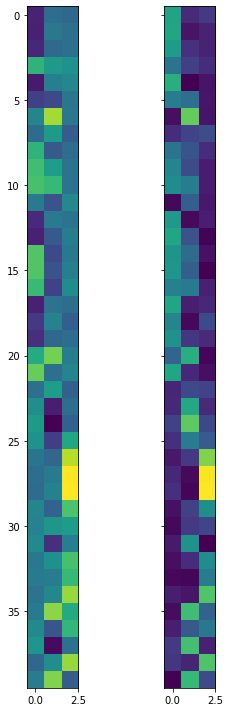

In [70]:
comp = pca3.components_
comp_abs = np.abs(comp)
fig, ax = plt.subplots(sharey=True, ncols=2, figsize=(5,10))
ax[0].imshow(comp.T)
ax[1].imshow(comp_abs.T)

# ax[0].set(yticks=np.arange(len(questions)), 
#          yticklabels=questions)
plt.tight_layout()
# plt.savefig('{}/comp.png'.format(ana_name))
plt.show()

In [176]:
np.savetxt('{}/X.csv'.format(dir_ana_plot), X, delimiter=',')
np.savetxt('{}/Xis.csv'.format(dir_ana_plot), Xis, delimiter=',')
np.savetxt('{}/pca3.csv'.format(dir_ana_plot), Xis_pca3, delimiter=',')
np.savetxt('{}/comp.csv'.format(dir_ana_plot), comp, delimiter=',')
y.to_csv('{}/y.csv'.format(dir_ana_plot), index=False)

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [25]:
n_comp = 4
pca4 = PCA(n_components=n_comp)

# Xs_pca4 = pca4.fit_transform(Xs)
Xis_pca4 = pca4.fit_transform(Xis)

In [48]:
pca2.explained_variance_ratio_

array([0.39733277, 0.12853882])

In [99]:
import json

dat_json = {}
dat_json['pca2'] = []
dat_json['comp'] = []

for i in range(len(Xis_pca2)):
    dat_json['pca2'].append({
        'name': dat_.iloc[i, 0],
        'party': parties[dat_.iloc[i, 2]-1, 5],
        'PC0': Xis_pca2[i, 0],
        'PC1': Xis_pca2[i, 1]
    })
for i in range(len(comp.T)):
    dat_json['comp'].append({
        'PC0': comp[0, i],
        'PC1': comp[1, i]
    })

with open('{}/data.txt'.format(ana_name), 'w') as outfile:  
    json.dump(dat_json, outfile, ensure_ascii=False)

In [68]:
ana_name = '201907172020'

dat_ = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/dat_.csv'.format(ana_name))
print('{}'.format(len(dat_)))

Xis_pca = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/Xis_pca.csv'.format(ana_name), header=None)
print('{}'.format(len(Xis_pca)))
Xis_pca = Xis_pca.values

comp = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/comp.csv'.format(ana_name), header=None)
print('{}'.format(len(comp)))
comp = comp.values

y = pd.read_csv('https://raw.githubusercontent.com/shumez/election/master/councilor2019/analysis/{}/y.csv'.format(ana_name), header=None)
y = y.iloc[:, 0]
print('{}'.format(len(y)))
# y = y.values

344
344
3
344


In [68]:
year = '2021'

import plotly.graph_objs as go

import plotly.express as px

data = []

for p in range(len(parties)):
    trace0 = go.Scatter3d(
        x = Xis_pca3[y_party==p+1, 0],
        y = Xis_pca3[y_party==p+1, 1],
        z = Xis_pca3[y_party==p+1, 2],
        name = parties[p, 1],
        mode = 'markers',
        marker = dict(
            color = c[parties[p, 2]],
            size = 5,
            opacity = .8
        ),
        text = y[y_party==p+1].iloc[:, 1]
    )
    
    data.append(trace0)

layout = go.Layout(
    title = 'Representative Election in {}'.format(year),
    scene = dict(
        xaxis = dict(
            title = 'PC0'
        ), 
        yaxis = dict(
            title = 'PC1'
        ),
        zaxis = dict(
            title = 'PC2'
        )
    )
    
#     showlegend = True
)

# fig['layout'].up
fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='pca3_3d_{}'.format(year))

# plotly
# plot_fig = tls.mpl_to_plotly(fig)
# plot_url = py.plot_mpl(fig)

In [14]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
Xis_kpca = kpca.fit_transform(Xis)


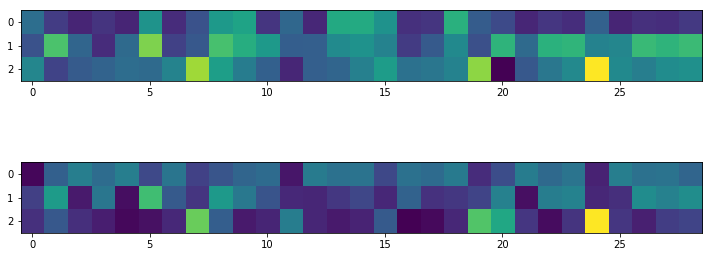

In [7]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))
ax[0].imshow(comp)
ax[1].imshow(comp_abs)
plt.tight_layout()
plt.show()

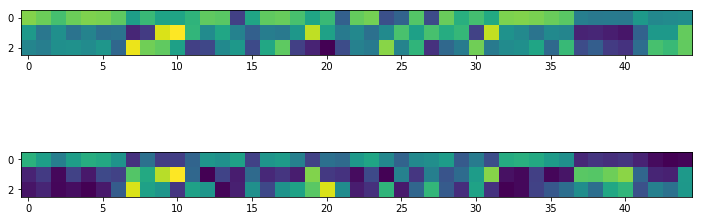

In [26]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

ax[0].imshow(comp)
ax[1].imshow(comp_abs)

plt.tight_layout()
plt.show()

## CoV

In [82]:
dat_cv.tail(5)

,Q2_1,Q2_2,Q2_3
1053,1.0,2.0,3.0
1054,4.0,5.0,2.0
1055,3.0,2.0,1.0
1056,1.0,2.0,4.0
1057,NaN,NaN,NaN


In [99]:
dat_cov = pd.DataFrame(np.tile(np.nan, (len(dat_cv.index), 8)))

for i in range(len(dat_cv.index)):
    for j in range(3):
        if dat_cv.iloc[i,j] == 1.0:
            dat_cov.iloc[i,0] = 1.0
        if dat_cv.iloc[i,j] == 2.0:
            dat_cov.iloc[i,1] = 1.0
        if dat_cv.iloc[i,j] == 3.0:
            dat_cov.iloc[i,2] = 1.0
        if dat_cv.iloc[i,j] == 4.0:
            dat_cov.iloc[i,3] = 1.0
        if dat_cv.iloc[i,j] == 5.0:
            dat_cov.iloc[i,4] = 1.0
        if dat_cv.iloc[i,j] == 6.0:
            dat_cov.iloc[i,5] = 1.0
        if dat_cv.iloc[i,j] == 7.0:
            dat_cov.iloc[i,6] = 1.0
        if dat_cv.iloc[i,j] == 8.0:
            dat_cov.iloc[i,7] = 1.0
    

dat_cov = dat_cov.replace(np.NaN, 0)    
dat_cov.columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8']
dat_cov.tail(10)


,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8
1048,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1049,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1050,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1051,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1052,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1053,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1054,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1055,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1056,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
